In [1]:
from src.functions import *

**Problema 1**: Em sistemas termodinâmicos, a distribuição de Boltzmann descreve a probabilidade
de encontrar um sistema em um estado específico com energia $E$. Este conceito é fundamental para
entender fenômenos como equilíbrio térmico e a distribuição de partículas em diferentes níveis de
energia. Considere a distribuição de Boltzmann para o problema do oscilador harmônico *clássico*:

$$
P(x) \propto e^{-\beta E(x)}, \text{ com } E(x) = \frac{1}{2} kx^2,
$$

onde $β = 1/k_BT$ , $k_B$ é a constante de Boltzmann e $T$ é a temperatura. Sob estas condições, a
distribuição de equilíbrio para a coordenada $x$ é gaussiana, com média zero e variância $\sigma = \frac{1}{\beta k}$.


**(a)** Gere valores aleatórios de $x$ a partir de uma distribuição uniforme e aceite-os com probabilidade
proporcional a $P (x)$ (método de rejeição). Assim, obtém-se uma amostra de valores de $x$ que
devem refletir a distribuição de Boltzmann. 


**(b)** Crie um histograma dos valores simulados de $x$ e normalize-o para estimar a densidade de probabilidade empírica. 

**(c)** Sobreponha a curva teórica da distribuição de Boltzmann, dada por:

$$
P_{teórica} (x) = \sqrt{\frac{\beta k}{2\pi}} exp(-\frac{\beta k x^2}{2})
$$

**(d)** Calcule a média e a variância da amostra obtida e compare com os valores teóricos:

$$
\mathbb{E}[x] = 0, Var(x) = \frac{1}{\beta k} .
$$

**(e)** Realize os testes estatísticos de Kolmogorov-Smirnov (K-S) e qui-quadrado para avaliar quan-
titativamente se as amostras são consistentes com a distribuição teórica. (**f**) Crie um Q-Q plot
para fornecer uma ferramenta visual adicional de comparação entre a distribuição empírica e a distribuição teórica. Dessa forma, além da inspeção visual (histograma e curva teórica), a média, a variância, bem como testes estatísticos e o Q-Q plot, fornecerão evidências quantitativas e gráficas da qualidade da aproximação Monte Carlo à solução analítica

## Todas as funções essenciais utilizadas no jupyter estão definidas no src/questão1.py

### **Item (a)**

In [2]:
# Item (a) <---------------
# Determina largura da gaussiana
b = 10
a = -b
n_samples = 5*10**5
M = 50
# Retorna lista de valores aceitos

samples = rejection_sampling(n_samples, a, b, M, P, g)
print('Amostras aceitas para distribuição de Boltzmann (Rejection samples)')
#print(samples)

Amostras aceitas para distribuição de Boltzmann (Rejection samples)


### **Item (b)**

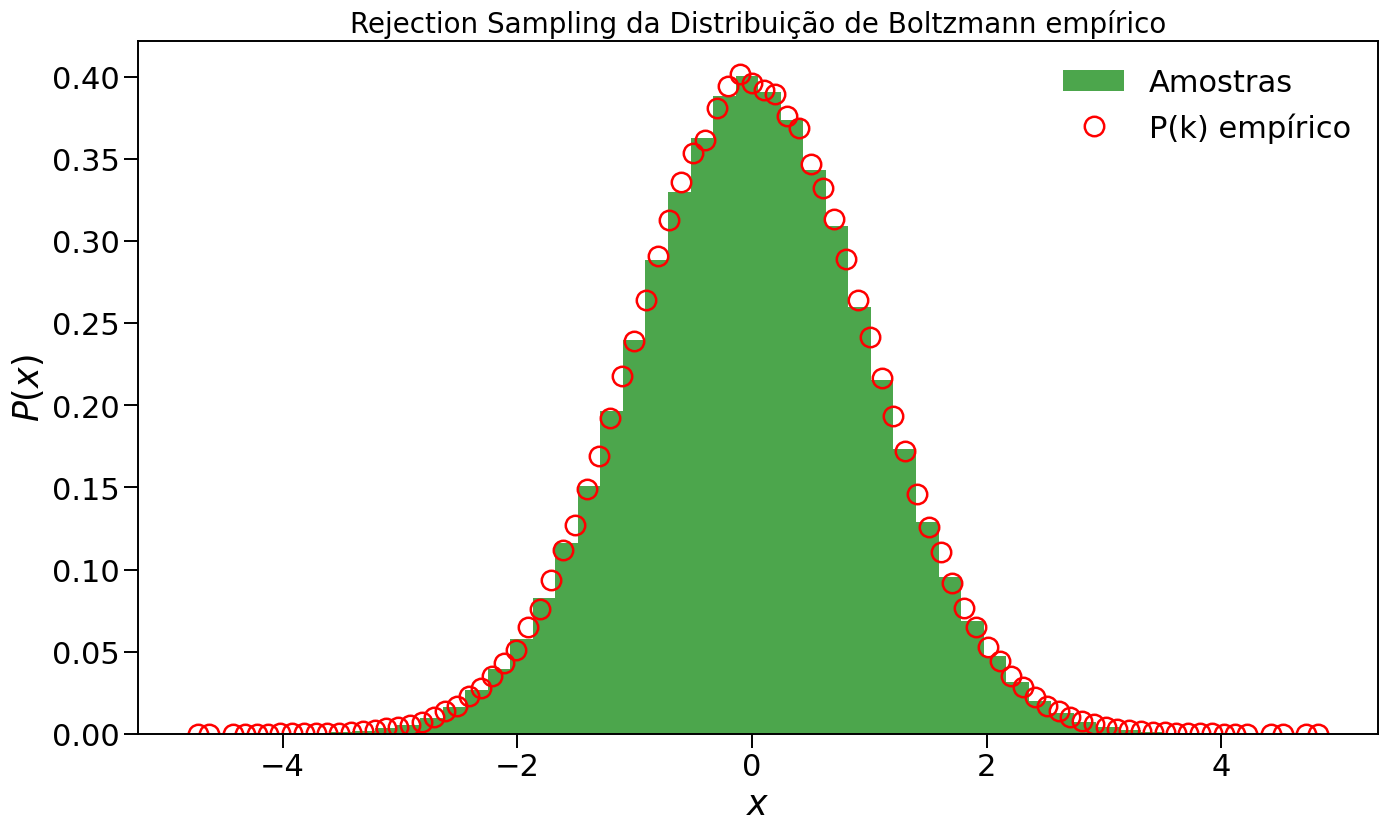

In [3]:
# Item (b) - Plot do Histograma <---------------
m = 200 # número de bins na distribuição
# x_aceito e p(x_aceito) empíricos
k_data, Pk_data = distribution_data(samples, a, b, m)
fig = plt.subplots(figsize=(16, 9))
plt.hist(samples, bins=50, density=True, alpha=0.7, label="Amostras", color='green')
plt.plot(k_data, Pk_data, 'o', label='P(k) empírico', mfc = "None", mec = "red", ms=14, mew=1.8)
#plt.plot(x, P(x) / sum(P(x)), label="Distribuição alvo (não normalizada)", color='red')
#plt.plot(samples, P(samples) / sum(P(samples)), label="Distribuição alvo (não normalizada)", color='red')
plt.legend(prop={"size": 22}, fancybox=True, framealpha=0.0)
plt.xlabel(r"$x$", size=25)
plt.ylabel(r"$P(x)$", size=25)
plt.title("Rejection Sampling da Distribuição de Boltzmann empírico", size=20)
plt.tick_params('both', width=1.4, length=10, labelsize=22)
plt.savefig("results/Questão1/RejectionEmpirico.pdf")
plt.show()

### **Item (c)**

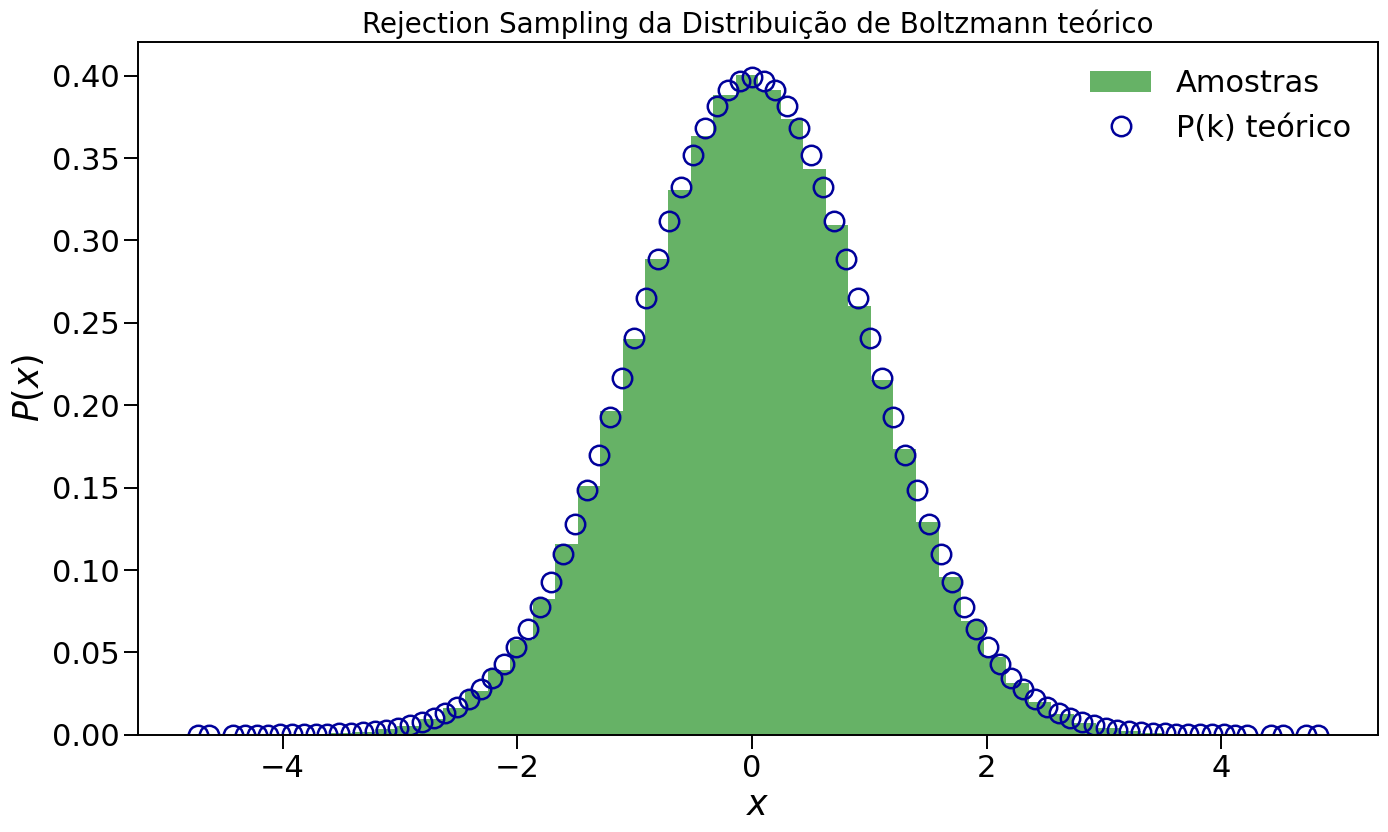

In [4]:
Pk_teo = [P_teorica(i) for i in k_data]
# Visualizar os resultados
m = 50 # número de bins na distribuição
fig = plt.subplots(figsize=(16, 9))
plt.hist(samples, bins=50, density=True, alpha=0.6, label="Amostras", color='green')
plt.plot(k_data, Pk_teo, 'o', label='P(k) teórico', mfc = "None", mec = "#00019a", ms=14, mew=1.8)
#plt.plot(x, P(x) / sum(P(x)), label="Distribuição alvo (não normalizada)", color='red')
#plt.plot(samples, P(samples) / sum(P(samples)), label="Distribuição alvo (não normalizada)", color='red')
plt.legend(prop={"size": 22}, fancybox=True, framealpha=0.0)
plt.xlabel(r"$x$", size=25)
plt.ylabel(r"$P(x)$", size=25)
plt.title("Rejection Sampling da Distribuição de Boltzmann teórico", size=20)
plt.tick_params('both', width=1.4, length=10, labelsize=22)
plt.savefig("results/Questão1/RejectionTeorico.pdf")
plt.show()

### **Item (d)**

In [5]:
E = np.mean(samples) # Valor esperado das amostras (média)
var = np.var(samples) # Variância das amostras

E_teo = 0.0 # Valor esperado teórico
var_teo = 1 / beta * k # Variância teórica

Err_E = abs(E - E_teo)
Err_var = abs(var - var_teo)

print(f'E_medido = {E}, E_teórico = {E_teo}, Erro_Absoluto = {Err_E}')
print(f'var_medido = {var}, var_teórico = {var_teo}, Erro_Absoluto = {Err_var}')

E_medido = -0.0002853401280082176, E_teórico = 0.0, Erro_Absoluto = 0.0002853401280082176
var_medido = 1.0019650177351247, var_teórico = 1.0, Erro_Absoluto = 0.0019650177351246967


### **Item(e)**

In [6]:
from scipy.stats import ks_2samp, chi2_contingency

ks_stat, ks_p_value = ks_2samp(Pk_teo, Pk_data)

bins = np.linspace(min(min(Pk_teo), min(Pk_data)), max(max(Pk_teo), max(Pk_data)), 10)
hist_teo, _ = np.histogram(Pk_teo, bins=bins)
hist_data, _ = np.histogram(Pk_data, bins=bins)

# Remover categorias onde ambos os histogramas são zero
valid_indices = (hist_teo > 0) | (hist_data > 0)
hist_teo = hist_teo[valid_indices]
hist_data = hist_data[valid_indices]

# Nova tabela de contingência
contingency_table = np.array([hist_teo, hist_data])

# Aplicar o teste qui-quadrado
chi2_stat, chi2_p_value, _, _ = chi2_contingency(contingency_table)

# Interpretação dos resultados
alpha = 0.05  # Nível de significância

# Teste KS
if ks_p_value < alpha:
    print("KS Test: Rejeitamos H0. As distribuições são diferentes.")
else:
    print("KS Test: Não rejeitamos H0. As distribuições podem ser iguais.")

# Teste Qui-Quadrado
if chi2_p_value < alpha:
    print("Qui-Quadrado: Rejeitamos H0. As distribuições são diferentes.")
else:
    print("Qui-Quadrado: Não rejeitamos H0. As distribuições podem ser iguais.")

KS Test: Não rejeitamos H0. As distribuições podem ser iguais.
Qui-Quadrado: Não rejeitamos H0. As distribuições podem ser iguais.


### **Item (f)**

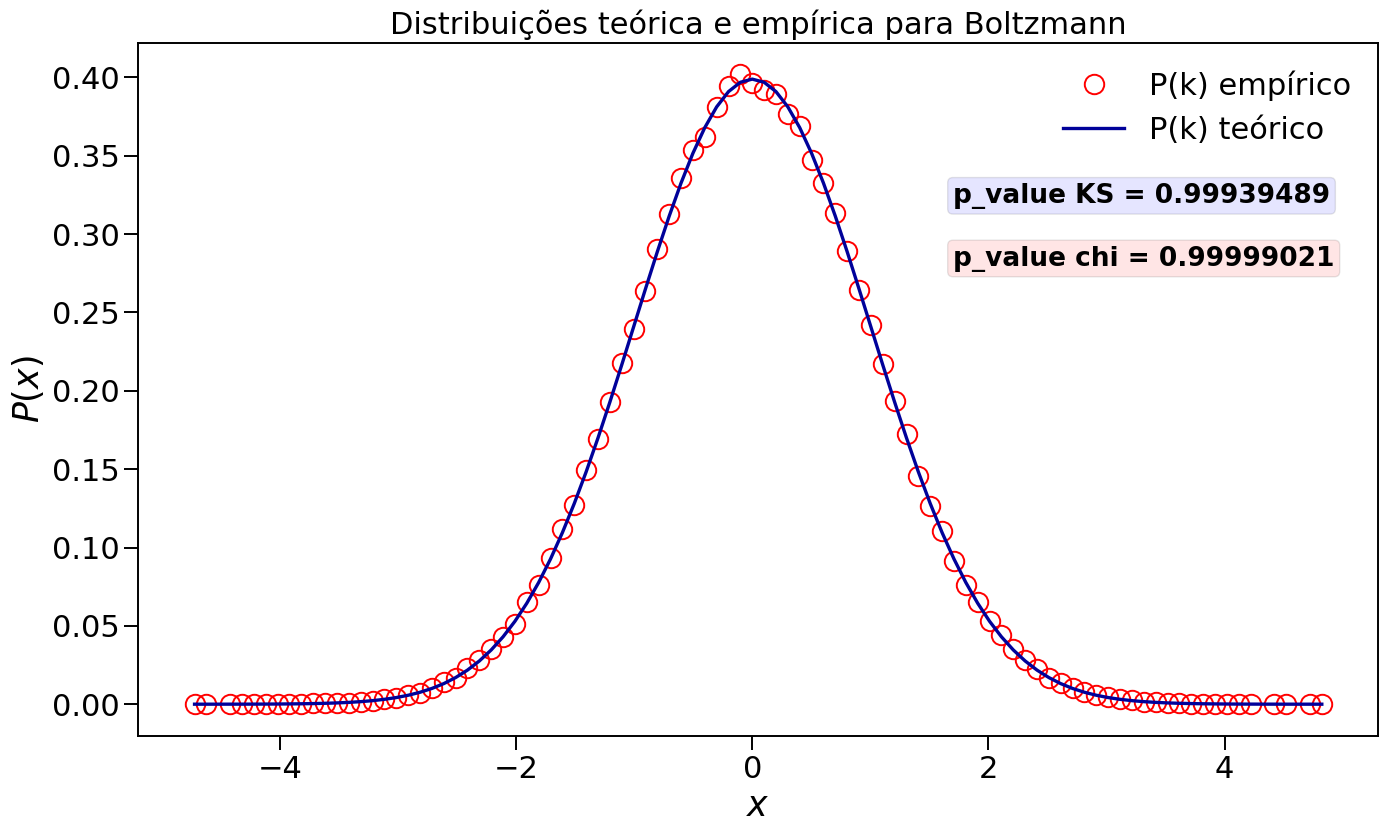

In [7]:
# Item (c) - Plot do Histograma <---------------
Pk_teo = [P_teorica(i) for i in k_data]
# Visualizar os resultados
#x = np.linspace(-a, a, 1000)
fig = plt.subplots(figsize=(16, 9))
plt.plot(k_data, Pk_data, 'o', label='P(k) empírico', mfc = "None", mec = "red", ms=14, mew=1.4)
plt.plot(k_data, Pk_teo, label='P(k) teórico', mfc = "None", color = "#00019a", linewidth=2.4)
#plt.plot(x, P(x) / sum(P(x)), label="Distribuição alvo (não normalizada)", color='red')
#plt.plot(samples, P(samples) / sum(P(samples)), label="Distribuição alvo (não normalizada)", color='red')

plt.text(x=1.7, y=.32, s=rf"p_value KS = {ks_p_value:.8f}", fontsize=19, fontweight="bold", 
        color="black",bbox=dict(facecolor='blue', edgecolor="black", boxstyle="round,pad=0.2", alpha=.1))
plt.text(x=1.7, y=.28, s=rf"p_value chi = {chi2_p_value:.8f}", fontsize=19, fontweight="bold", 
        color="black",bbox=dict(facecolor='red', edgecolor="black", boxstyle="round,pad=0.2", alpha=.1))

plt.legend(prop={"size": 22}, fancybox=True, framealpha=0.0)
plt.xlabel(r"$x$", size=25)
plt.ylabel(r"$P(x)$", size=25)
plt.title("Distribuições teórica e empírica para Boltzmann", size=22)
plt.tick_params('both', width=1.4, length=10, labelsize=22)
plt.savefig("results/Questão1/Q-Q_plot.pdf")
plt.show()